# Perdidas en los transformadores
- Ing. Pablo De Cesare
- Ing. Ramiro Rodriguez Colmeiro
- Ing. Franco Zaccra


En los transformadores, como en cualquier dispositivo electrico se producen perdidas de potencia.
Hay perdidas que son independientes de la carga que se conectan... es decir que hasta en vacio ya tenemos perdida de potencia.

Estas perdidas son llamadas "Perdidas en el Hierro".
Hay dos perdidas en el hierro.
- Una producidas por la magnetizacion y desmagnetizacion del nucleo que soporta al transformador.
- Otra por la variacion del flujo magnetico en el nucleo del transformador que genera corrientes parasitas o corrientes de Fucault.

<img src=".\mag1.png">

<img src=".\i.png">

- Las primera es caracterizada por el ciclo de histeresis del material magnetico.
El nucle almacena energia en forma de campo magnetico, pero no toda esta energia es devuelta.

https://es.wikipedia.org/wiki/Hist%C3%A9resis


- La segunda, generada por las corrientes parasitas o de Foucauls, que se inducen en el nucleo como consecuencia de la variacion de flujo magnetico, justifica el laminado de los nucleos de los transformadores, como forma de aumentar la resistencia y bajar estas corrientes.

https://es.wikipedia.org/wiki/Corriente_de_Foucault


Tambien hay otras perdidas provocadas por la resistencia de los arrollamientos y el flujo disperso. Estas en cambio si dependenden de la carga que se les conecta. A mayor carga, mayor corriente, mayor potencia disipada en la resistencia de los bobinados.

# Modelo del Transformador
Para caracterizar a los transformadores se plantea un modelo electrico cuyos elementos representan la naturaleza de cada perdida y mediante ensayos se estiman el valor de cada uno de los componentes

<img src=".\1.png">

Como las perdidas en el hierro dependen de la tension aplicada y son independientes del consumo y a la vez, las perdidas en el cobre son independientes de la tension aplicada, pero no de la corriente que circula por los bobinados (consumo) se plantean 2 ensayos

- Ensayo del transformador en vacio
- Ensayo del transformador en cortocircuito

claramente, el primero para caracterizar las perdidas en el hierro y el segundo para las perdidas en los bobinados

# Ensayo del transformador en vacio

El ensayo clasico del transformador se realiza con 3 instrumentos (Voltimetro, amperimetro y Watimetro)
pero vamos a realizarlo unicamente con un osciloscopio de 2 canales midiendo la tension y la corriente del primario.

<img src=".\6.png">

La corriente la hallaremos como el cociente de la caida de tension y el valor de la resistencia



In [33]:
# Los imports de rigor
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

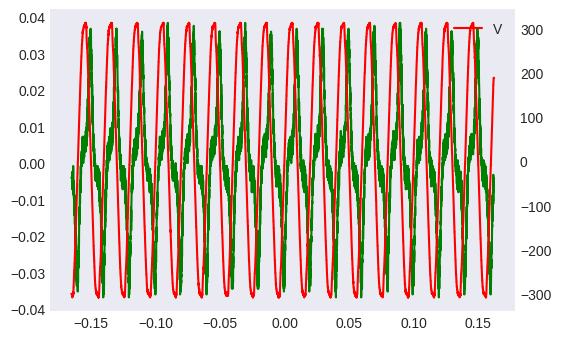

In [34]:
data=np.genfromtxt('trafo_en_vacio.csv',delimiter=',')

R=10 #
t=data[2:,0]
V=data[2:,1]  # tension de linea
I=data[2:,2]/R   # corriente
plt.figure(dpi=100)
ax1 = plt.gca()
ax2 = ax1.twinx()  
ax2.plot(t,V,"r",label="V")
ax1.plot(t,I,"g",label="I")
plt.legend(loc='upper right')




#plt.figure(dpi=100)
#plt.plot(t,V,t,I*5000)



potencia en la R= 0.16735404088339184 W
La perdida de potencia por el hierro= 0.8501740841166083 W


Text(0, 0.5, 'W')

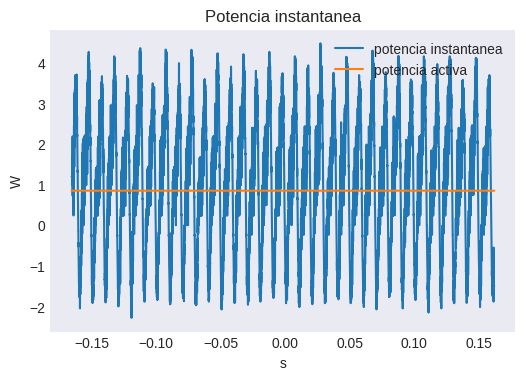

In [35]:
p=V*I # la potencia instantanea como el producto de la tension y la corriente en el primario
#pr=np.mean(10*I**2)  # potencia disipada por la resistencia
pr=np.sqrt(np.mean(I**2))*R
pactiva=np.mean(p)-pr  # potencia activa disipada por el transformador en vacio

print("potencia en la R= {} W".format(pr))
print("La perdida de potencia por el hierro= {} W".format(pactiva))

p_line=np.ones(len(p))*pactiva
plt.figure(dpi=100)
plt.plot(t,p,label="potencia instantanea")
plt.plot(t,p_line,label="potencia activa")
plt.legend(loc='upper right')
plt.title("Potencia instantanea")
plt.xlabel("s")
plt.ylabel("W")

Como en vacio pueden despreciarse las perdidas en el cobre del bobinado, por la baja corriente que circula, las perdidas medidas representan las perdidas en el hierro.

$P_{FE}=P_{H}+P_{F}$

Estas perdidas que hemos calculado son la suma de las perdidas por histeresis y por corrientes parasitas

Ahora vamos a medir la potencia perdida por la histeresis del nucle

# Perdidas Magneticas
## Armamos este circuito

In [36]:
## el poder de numpy es tremendo!
data=np.genfromtxt('Trazo XT.csv',delimiter=',')


<img src=".\2.png">

<img src=".\4.png">

Ese circuito RC en el secundario tiene un por que.... 

La tension inducida en el secundario esta dada por

$V_{s}=N_{s}$.$\frac{\partial{\Phi}}{\partial{t}}$                       (1)

$V_{s}=N_{s}$.A.$\frac{\partial{B}}{\partial{t}}$

siendo A el area perpendicular al flujo magnetico

En el secundario se puede plantear

$V_{s}=V_{c}+I_{s}.R_{2}$

$Q=V_{c}.C$

$I_{s}=\frac{\partial{Q}}{\partial{t}}$

Re-escribiendo la encuancion de la malla del secundario

$V_{s}=\frac{Q}{C}+R_{2}.C.\frac{\partial{V_{c}}}{\partial{t}}$

Con un valor de C lo suficientemente grande

$V_{s}=R_{2}.C.\frac{\partial{V_{c}}}{\partial{t}}$                       (2)

uniendo (1) y (2)


B=$\frac{R_{2}.C}{N_{s}.A}.V_{c}$                                         (3)

demostrandose que la tension en el capacitor es proporcional al campo inducido B, por lo tanto uno de los canales de nuestro osciloscopio lo vamos a utilizar par amedir la tension en el capacitor.

Por otro lado, a travez de la ley de Ampere, podemos relacionar la corriente con el campo magnetico


H=$\frac{N_{p}.I_{p}}{l}$

si colocamos una resistencia en el primario para medir la corriente

H=$\frac{N_{p}.V}{R_{1}.l}$                                              (4)

Quedando el voltage sobre la resistencia R1 en el primario proporcional al campo magnetico H


Obteniendose en el Osciloscopio

<img src=".\3.png">

Trazo que esta capturado en el archivo CSV que leimos

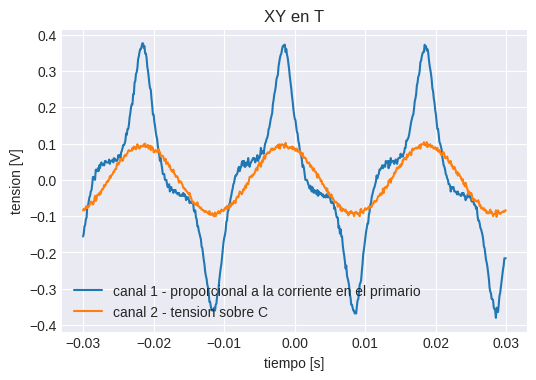

In [37]:
# Separamos la informacion que contiene
t=data[2:,0]
ch1=data[2:,1]
ch2=data[2:,2]

R1 = 10.0   # 10ohms
C = 1.5e-6 # 1uF
R2 = 470e3 # 
N = 220/12 #

style.use('seaborn-dark')

plt.figure(dpi=100)  # si queres el grafico con otro tamaño, descometa la linea
plt.plot(t,ch1,t,ch2)
plt.grid()
plt.ylabel("tension [V]")
plt.xlabel("tiempo [s]")
plt.title('XY en T')
plt.legend(['canal 1 - proporcional a la corriente en el primario', 'canal 2 - tension sobre C'])

# Modo XY del osciloscopio

con el modo XY podemos representar el canal 2 en el eje Y y el canal 1 en el eje X representanco asi el campo de induccion B en funcion del campo magnetico H

<img src=".\5.png">

Text(0.5, 1.0, 'XY')

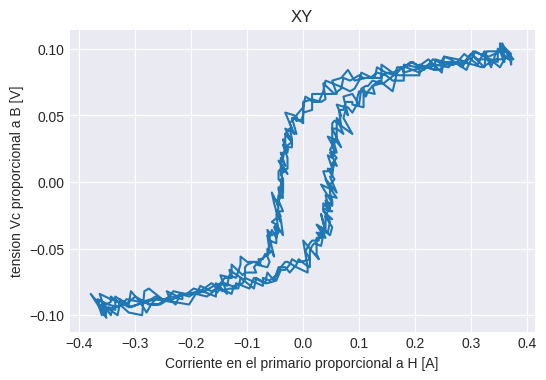

In [38]:

plt.figure(dpi=100)
plt.plot(ch1,ch2)
plt.grid()
plt.ylabel("tension Vc proporcional a B [V]")
plt.xlabel("Corriente en el primario proporcional a H [A]")
plt.title('XY')

# Primero nos vamos a librar del ruido.

El método Savitzky–Golay se basa en el cálculo de una regresión polinomial local (de grado k), con al menos k+1 puntos equiespaciados, para determinar el nuevo valor de cada punto. El resultado será una función similar a los datos de entrada, pero suavizada.

https://es.wikipedia.org/wiki/Filtro_de_Savitzky%E2%80%93Golay

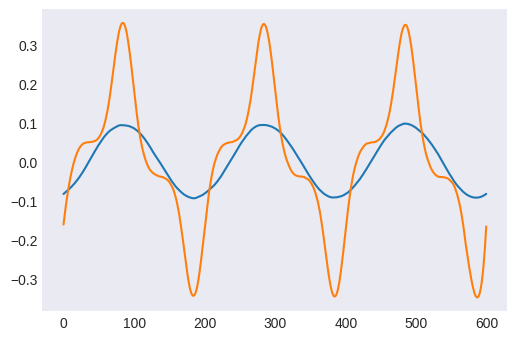

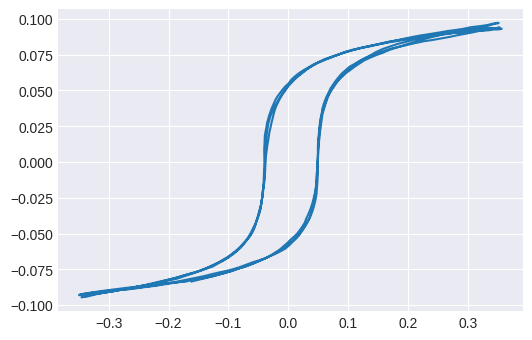

In [39]:
from scipy import signal

ch1 = signal.savgol_filter(ch1, 59, 4) # 59 = ventana ; 4 = grado de polinomio
plt.figure(dpi=100)
ch2 = signal.savgol_filter(ch2, 59, 4)
plt.plot(ch2)
plt.plot(ch1)

plt.figure(dpi=100)
plt.plot(ch1,ch2)
plt.grid()

# Energia almacenada en un campo magnetico

La energía perdida por ciclo por unidad de volumen es dado por:

$u = \int B \cdot dH$

Reemplazando B y H de las ecuaciones (3) y (4)

$u = \frac{R_{2}.N_{p}.C}{N_{s}.R_{1}.A.l}\int V_{c} \cdot dV$

multiplicando a ambos lados por A . l (volumen del nucleo) tendremos la energia por cada ciclo

$U = \frac{R_{2}.N_{p}.C}{N_{s}.R_{1}}\int V_{c} \cdot dV$

llamaremos k a la constante por fuera de la integral

$k= \frac{R_{2}.N_{p}.C}{N_{s}.R_{1}}$

$k= \frac{R_{2}.C}{R_{1}}.N$


In [40]:
k=R2*C*N/R1
print(k)

1.2925


Text(0.5, 1.0, 'XY en T')

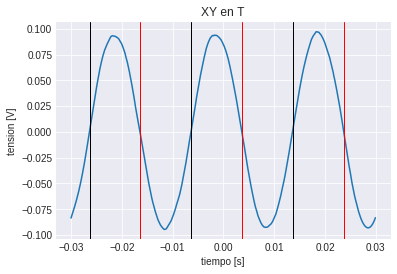

In [41]:
# Busco los cruces por cero, de la señal de tensión para dividir los ciclos
def get_zeros_signal(signal_in, delta_min = 5):

  zero_cross = list()
  cross_slope = list()
  i_last = 0
  for i in range(1, signal_in.shape[0]):

    if (signal_in[i-1] <= 0) and (signal_in[i] > 0):
      if (i_last == 0) or ((i-i_last)>delta_min):
        zero_cross.append(i)
        cross_slope.append(1)
        i_last = i
    if (signal_in[i-1] >= 0) and (signal_in[i] < 0):
      if (i_last == 0) or ((i-i_last)>delta_min):
        zero_cross.append(i)
        cross_slope.append(-1)
        i_last = i

  return zero_cross, cross_slope

cruces_list, slopes_list = get_zeros_signal(ch2)

#plt.figure(dpi=150)
plt.plot(t,ch2)

for cruce, slope in zip(cruces_list, slopes_list):
  if slope > 0:
    plt.axvline(t[cruce], color='black', linestyle='-', linewidth='1.0')
  elif slope < 0:
    plt.axvline(t[cruce], color='red', linestyle='-', linewidth='1.0')


plt.grid()
plt.ylabel("tension [V]")
plt.xlabel("tiempo [s]")
plt.title('XY en T')

Ciclos completos: 2


Text(0.5, 1.0, 'XY')

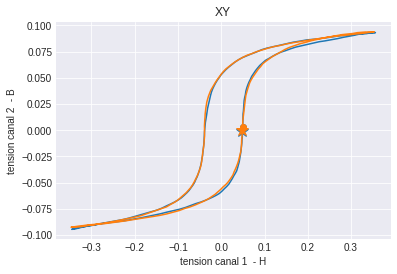

In [42]:
# Separo las señales en ciclos
limits_ciclos = list()
trigger_slope = slopes_list[0] # Primera pendiente
current_limits = np.zeros(2, dtype=np.int32)
current_limits[0] = cruces_list[0] # Primer cruce
for cruce, slope in zip(cruces_list, slopes_list):
  # Ignoro el primero
  if current_limits[0] == cruce:
    continue

  # Si la pendiente es igual a la inicial quiere decir que arrancó de nuevo
  if (trigger_slope == slope):
    # Agrego el final del ciclo
    current_limits[1] = cruce
    limits_ciclos.append(current_limits)
    # Donde termina una empiza el siguiente...
    current_limits = np.zeros(2, dtype=np.int32)
    current_limits[0] = cruce

print('Ciclos completos: %d'%len(limits_ciclos))

# Armo una lista de ciclos completos (divido al señal de entrada en ciclos)
ciclos_ch1_list = list()
ciclos_ch2_list = list()
for lim_ciclo in limits_ciclos:
  ciclos_ch1_list.append(np.copy(ch1[lim_ciclo[0]:lim_ciclo[1]]))
  ciclos_ch2_list.append(np.copy(ch2[lim_ciclo[0]:lim_ciclo[1]]))

# Los ploteo
#plt.figure(dpi=150)
for ch1_this, ch2_this in zip(ciclos_ch1_list, ciclos_ch2_list):
  plt.plot(ch1_this,ch2_this)

  plt.plot(ch1_this[0], ch2_this[0], '.', color=plt.gca().lines[-1].get_color(), markersize=12)
  plt.plot(ch1_this[-1], ch2_this[-1], '*', color=plt.gca().lines[-1].get_color(), markersize=12)

plt.grid()
plt.ylabel("tension canal 2  - B")
plt.xlabel("tension canal 1  - H")
plt.title('XY')


In [43]:
# Finalmente tenemos una lista de ciclos de histéresis completos. 
# Ahora debemos sacar el area que esta dentro de la curva. Esto lo podemos
# hacer integrando el area bajo la curva que pasa por arriba y restarle el 
# área que pasa por debajo. 
# Pero por suerte numpy nos facilita la vida!

areas_medidas = list()
for ch1_this, ch2_this in zip(ciclos_ch1_list, ciclos_ch2_list):

  # Integramos con la regla del trapezoide (https://en.wikipedia.org/wiki/Trapezoidal_rule)
  # Que es, en pocas palabras, sumar el area de los trapzoides formados entre cada par de puntos
  # y usando el delta_x (que puede ser positivo o negativo)

  # Antes de integrar repetimos el punto final, para cerrar el ciclo
  ch2_aux = np.zeros(len(ch2_this)+1)
  ch2_aux[:-1] = ch2_this
  ch2_aux[-1] = ch2_this[0]
  ch1_aux = np.zeros(len(ch1_this)+1)
  ch1_aux[:-1] = ch1_this
  ch1_aux[-1] = ch1_this[0]

  # Integramos con np.trapz y agregamos el area a la lista
  areas_medidas.append(np.abs(np.trapz(ch2_aux, x=ch1_aux)))

print('Perdidas por ciclo = %g J'%(k*np.mean(areas_medidas)))
print("La potencia perdida (W=J/s) =%g W"%(k*np.mean(areas_medidas)/0.02))

Perdidas por ciclo = 0.0167006 J
La potencia perdida (W=J/s) =0.835032 W


# Valor de $\mu$ en funcion de H

En física se le denomina permeabilidad magnética a la capacidad que tienen los materiales, medios o sustancias de afectar y ser afectados por los campos magnéticos, así como la capacidad de convertirse en fuentes de estos, es decir, capacidad para crearlos sin la necesidad de corrientes externas. 

Los materiales se pueden clasificar según su permeabilidad magnética relativa en:

- Ferromagnéticos, cuyo valor de permeabilidad magnética relativa es muy superior a 1.
- Paramagnéticos o no magnéticos, cuya permeabilidad relativa es aproximadamente 1 (se comportan como el vacío).
- Diamagnéticos, de permeabilidad magnética relativa inferior a 1.


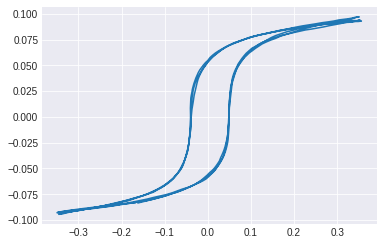

In [44]:
#plt.figure(dpi=150)
plt.plot(ch1,ch2)
plt.grid()

600


Text(0.5, 1.0, 'mu = dB/dH')

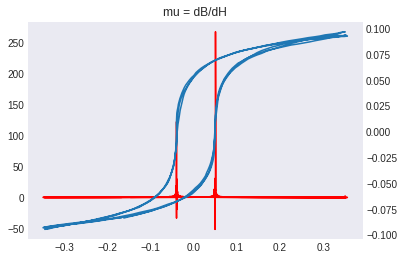

In [45]:
dB = ch2[1:] - ch2[:-1]
dH = ch1[1:] - ch1[:-1]
print(len(ch1))
mu = dB/dH

#plt.figure(dpi=150)
#plt.plot(dB)
#plt.title('dB')

#plt.figure(dpi=150)
ax1 = plt.gca()
ax2 = ax1.twinx()  
ax2.plot(ch1,ch2)
ax1.plot(ch1[1:],mu,'r')

#plt.figure(dpi=150)
#plt.plot(ch1f[1:],mu/20000,ch1f,ch2f)
#plt.grid()
#plt.xlabel('Corriente [A] - H')
#plt.ylabel('mu')
plt.title('mu = dB/dH')
#plt.xlim(-0.05,0.05)
#plt.ylim(-0.1,0.1)
#plt.show()


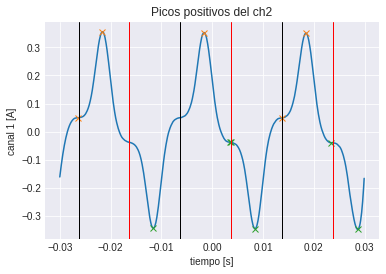

In [46]:
from scipy.signal import find_peaks

# Picos de la corriente ch1
# Nota: pp(pico positivo), pn(pico negativo)
# tp (tiempo para picos positivos)
# tn (tiempo para picos negativos)
pp,_ = find_peaks(ch1, [0.035,])
pn,_ = find_peaks(-ch1, [0.035,])
ch1_pp = ch1[pp]
ch1_pn = ch1[pn]
tp = t[pp]
tn = t[pn]


#plt.figure(dpi=150)
plt.plot(t, ch1)
plt.plot(tp, ch1_pp, 'x')
plt.plot(tn, ch1_pn, 'x')

# Cruces por cero
for cruce, slope in zip(cruces_list, slopes_list):
  if slope > 0:
    plt.axvline(t[cruce], color='black', linestyle='-', linewidth='1.0')
  elif slope < 0:
    plt.axvline(t[cruce], color='red', linestyle='-', linewidth='1.0')

plt.grid()
plt.title('Picos positivos del ch2')
plt.xlabel("tiempo [s]")
plt.ylabel("canal 1 [A]")
plt.show()

In [47]:
# Valores de corriente
I_pos = sum(ch1_pp)/len(ch1_pp)
I_neg = sum(ch1_pn)/len(ch1_pn)

print('Valor de corriente positiva: %.6f A'%I_pos)
print('Valor de corriente negativa: %.6f A'%I_neg)

Valor de corriente positiva: 0.231886 A
Valor de corriente negativa: -0.193294 A


# 2) valor de corriente proporcional al campo coercitivo

# 3) valor de u(mu) en funcion de la corriente